In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  get_scorer_names,f1_score,roc_auc_score,precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

In [3]:
train_df = pd.read_feather("aggregated_train_data.ftr")
test_df = pd.read_feather("aggregated_test_data.ftr")
labels_df = pd.read_feather("train_labels.ftr")

In [4]:
intersection_train_labels = np.intersect1d(train_df["customer_ID"], labels_df["customer_ID"]).tolist()
intersection_test_labels = np.intersect1d(test_df["customer_ID"], labels_df["customer_ID"]).tolist()
train_y = labels_df.loc[labels_df["customer_ID"].isin(intersection_train_labels),:]
test_y = labels_df.loc[labels_df["customer_ID"].isin(intersection_test_labels),:]
train_df = train_df.drop(columns=["customer_ID"])
test_df = test_df.drop(columns=["customer_ID"])
train_y = train_y.drop(columns=["customer_ID"])
test_y = test_y.drop(columns=["customer_ID"])

In [5]:
def display_metrics(predictor,y_true, y_score, y_pred_labels):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    accuracy = accuracy_score(y_true, y_pred_labels)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_pred_labels)
    print("Precision score: ", precision)
    recall = recall_score(y_true, y_pred_labels)
    print("Recall score: ", recall)
    f1 = f1_score(y_true, y_pred_labels)
    print("F1 score: ", f1)
    rocauc = roc_auc_score(y_true, y_pred_labels)
    print("roc_auc score: ", rocauc)
    conf_matrix = confusion_matrix(y_true, y_pred_labels)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=predictor.classes_).plot(ax=ax1)
    fpr, tpr, _ = roc_curve(y_true, y_score[:, 1])
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax2)


In [6]:
lr_clf = LogisticRegression(class_weight='balanced', max_iter=1200)
lr_clf.fit(train_df, train_y["target"])

c:\Users\asude\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1200)

Accuracy:  0.8856092279617045
Precision score:  0.7218271403203081
Recall score:  0.9093401111192799
F1 score:  0.8048057259713701
roc_auc score:  0.8933201592620361


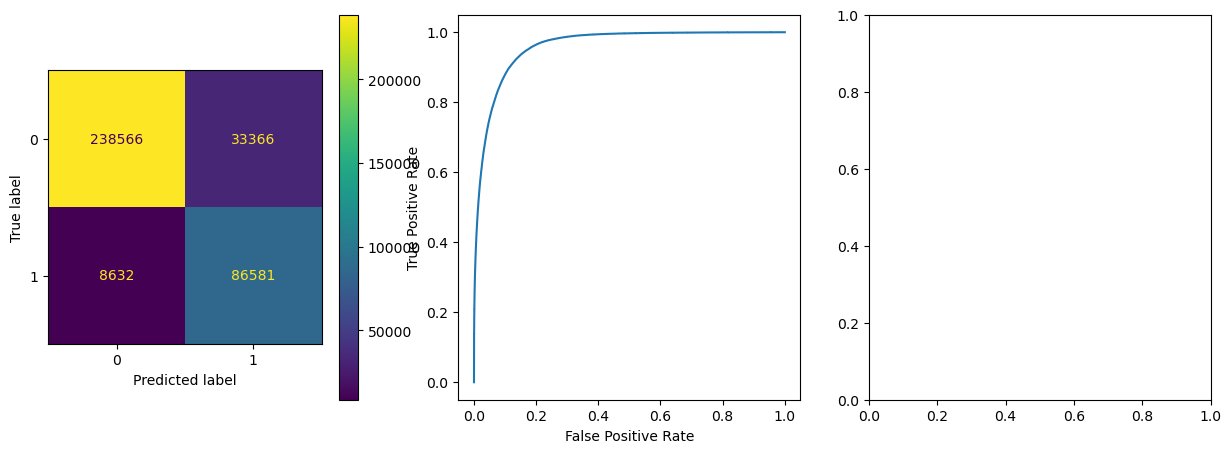

In [7]:
lr_clf_train_pred_score = lr_clf.predict_proba(train_df)
lr_clf_train_pred_labels = lr_clf.predict(train_df)

display_metrics(lr_clf, train_y["target"],lr_clf_train_pred_score, lr_clf_train_pred_labels)

Accuracy:  0.8867155575412177
Precision score:  0.7225945509042535
Recall score:  0.908575058225704
F1 score:  0.8049823666241464
roc_auc score:  0.8938582072828787


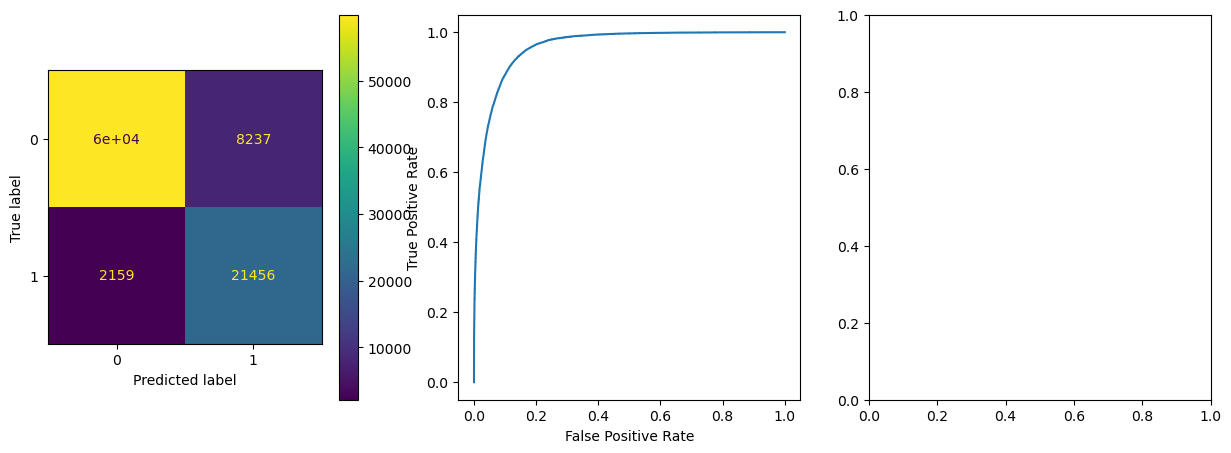

In [8]:
lr_clf_test_pred_score = lr_clf.predict_proba(test_df)
lr_clf_test_pred_labels = lr_clf.predict(test_df)

display_metrics(lr_clf, test_y["target"],lr_clf_test_pred_score, lr_clf_test_pred_labels)

In [12]:
svm_clf = SVC(probability=True)
svm_clf.fit(train_df, train_y["target"])

In [ ]:
svm_clf_train_pred_score = svm_clf.predict_proba(train_df)
svm_clf_train_pred_labels =svm_clf.predict_proba(train_df)


display_metrics(svm_clf, train_y["Attrition"],svm_clf_train_pred_score, svm_clf_train_pred_labels)